# Classify House

## Note book này nhằm phân loại các dạng Bất Động Sản dựa trên dữ liệu là các đoạn quảng cáo, rao bán bất động được thu thập trên Internet.

**Tóm Tắt: Bài Báo Cáo Bao Gồm Hai Phần**

***Phần 1: Tiền Xử Lý Dữ Liệu***

            1. Load dữ liệu.
            2. Khảo sát dữ liệu.
            3. Làm sạch dữ liệu.
            4. Chia tập dữ liệu thành tập huấn luyện và tập kiểm thử
            5. Tách từ.
            6. Loại bỏ stopwords.
            7. Xây dựng bộ từ điển.
            8. Lấy Batch Size
            
***Phần 2: Huấn Luyện Và Đánh Giá Mô Hình***

            I. Deep Learning
            1. FNN : 90%
            2. LSTM : 61%
            II. Các mô hình truyền thống
            1. Naive Bayes: 82.69%
            2. SVM: 44.7%
            3. Logistic Regression: 89.4%
            4. Decision Tree: 76.4%
            5. Random Forest : 76.7%
            6. Gradient Boosting: 80.2%
            
            
            
            
            
            
            
            
         
            
            
  
             

# PHẦN 1: TIỀN XỬ LÝ DỮ LIỆU

##1.LOAD DỮ LIỆU

In [ ]:
import pandas
data= pandas.read_csv(filepath_or_buffer='bds.csv',usecols=['Id','HouseTypeCssClass','Title','Content'])
data.head(5)

,Id,Title,Content,HouseTypeCssClass
0,804362,"Bán nhà MT Tô Hiến Thành Q.10, 92.4m2 (4.2m x ...","Bán nhà MT Tô Hiến Thành Q.10, 92.4m2 (4.2m x ...",tp-house
1,6206136,Cho nữ thuê phòng,cần 1 nữ ở ghép khu vực quận 12 hà huy ...,tp-house
2,589787,"Cần bán đất nền Everich 3, DT: 8x18m, vị trí đ...",Cần bán gấp đất nền The Everich III ngay trung...,tp-none
3,603842,"NHƯỢNG GẤP 250M2 (10X25M), NẰM ĐỐI DIỆN KCN MỸ...",- Gia đình có 1 nền đất được bồi thường tái đị...,tp-none
4,5821184,"SACOMBANK THANH LÝ 06 LÔ ĐẤT TẠI XÃ KON THỤP, ...",Lô 01: Diện tích 475 m2 (Đất ở: 50 m2; Đất trồ...,tp-none


## 2. KHẢO SÁT DỮ LIỆU

**Đếm số các loại nhãn có trong dữ liệu**

In [ ]:
data['HouseTypeCssClass'].value_counts()

tp-house        2311
tp-apartment    1272
tp-none         1103
tp-villa         134
tp-warehouse      85
tp-building       67
tp-hotel          28
Name: HouseTypeCssClass, dtype: int64

**Vẽ biểu đồ**

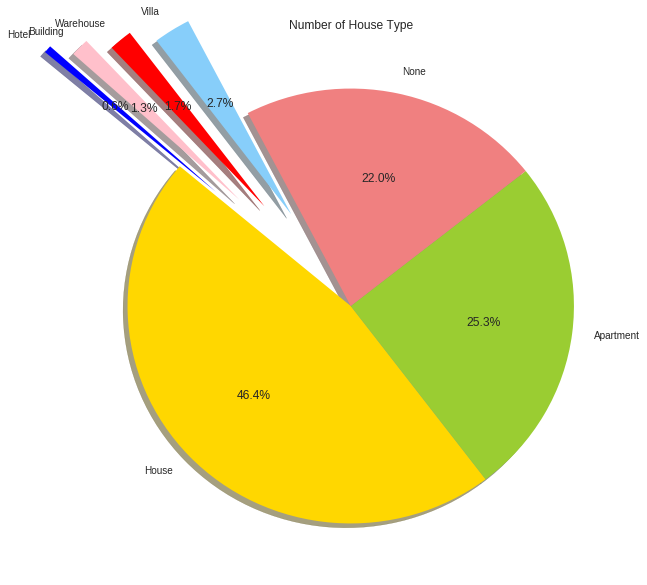

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10)) 
# Data to plot
labels = 'House','Apartment','None','Villa','Warehouse','Building','Hotel'
sizes = [2331, 1272, 1103, 134,85,67,28]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','pink','blue']
explode = (0, 0, 0, 0.5,0.6,0.7,0.8)  # explode 1st slice
 
# Plot 
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of House Type') 
#plt.axis('equal')
plt.show()

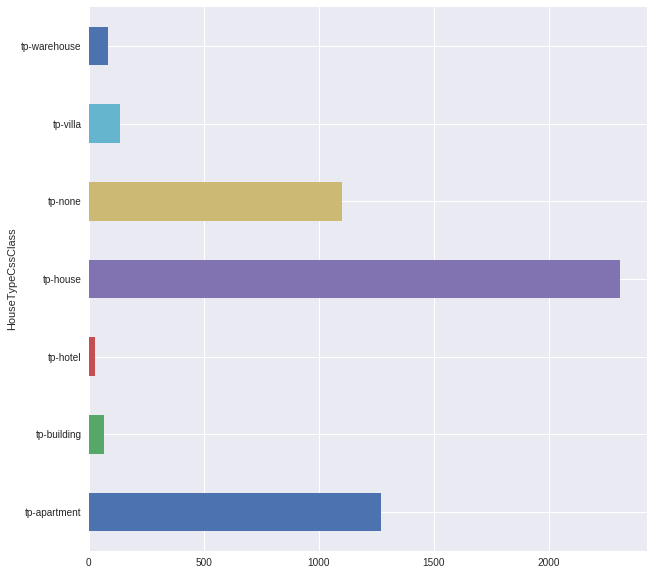

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
data.groupby('HouseTypeCssClass').HouseTypeCssClass.count().plot.barh()
plt.show()

## 3. LÀM SẠCH DỮ LIỆU

In [ ]:
import  os, string
import regex as re
def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
    return text.lower()
  


In [ ]:
data['Title'] = data['Title'].apply(normalize_text)
data.head(5)

,Id,Title,Content,HouseTypeCssClass
0,804362,bán nhà mt tô hiến thành q 10 92 4m2 4 2m x ...,"Bán nhà MT Tô Hiến Thành Q.10, 92.4m2 (4.2m x ...",tp-house
1,6206136,cho nữ thuê phòng,cần 1 nữ ở ghép khu vực quận 12 hà huy ...,tp-house
2,589787,cần bán đất nền everich 3 dt 8x18m vị trí đ...,Cần bán gấp đất nền The Everich III ngay trung...,tp-none
3,603842,nhượng gấp 250m2 10x25m nằm đối diện kcn mỹ...,- Gia đình có 1 nền đất được bồi thường tái đị...,tp-none
4,5821184,sacombank thanh lý 06 lô đất tại xã kon thụp ...,Lô 01: Diện tích 475 m2 (Đất ở: 50 m2; Đất trồ...,tp-none


## 4. CHIA TẬP DỮ LIỆU: TRAINING DATA&TESTDATA

**Chia dữ liệu làm 2 phần:**

- 80% trong tập dữ liệu làm dữ liệu huấn luyện
- 20% trong tập dữ liệu làm dữ liệu kiểm thử.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Title'], 
                                                    data['HouseTypeCssClass'], 
                                                    train_size = 0.8)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Kiểm tra kích thước của dữ liệu huấn luyện và dữ liệu kiểm thử

In [ ]:
print("X train", len(X_train))
print("X test", len(X_test))

X train 4000
X test 1000


## 5. TÁCH TỪ

In [ ]:
from pyvi import ViTokenizer,ViPosTagger

In [ ]:
def segment (data):
  #X_data = X_train
  tokenize = []
  for line in data:
    token=ViTokenizer.tokenize(line)
    tokenize.append(token)
      
  return tokenize

In [ ]:
X_train_token = segment(X_train)
X_test_token=segment(X_test)
y_train_token = segment(y_train)
y_test_token=segment(y_test)

In [ ]:
print(X_train_token)

['cho thuê nhà_nguyên căn 4pn 4wc quận 3', 'đất nền sân_bay long thành_đồng nai thổ_cư 100 cđt hưng_thịnh', 'căn_hộ đã bàn_giao oriental plaza mặt_tiền âu cơ – mua là vào ở ngay_k', 'mở bán giai_đoạn 2 siêu dự_án khu_đô_thị river view', 'cc trích sài – hồ tây 58m2 1 4tỷ căn view hồ tây cực đẹp', 'cần mua nhà mặt_phố ở quảng_an tây hồ giá khoảng 4 tỷ', 'bán miếng đất đường số 8 trường thạnh diện_tích 60m2 giá bán 1tỷ4 bao giấy_tờ lh 090 257 2019', 'bán gấp 2765m2 giá cực rẻ 900ng 1m2 đồng trạng cổ_đông sơn tây lh 0966 615 605', 'cho thuê mặt_bằng', 'cho thuê căn_hộ 25m2 hoàng hoa thám quận tân_bình', 'shophouse sun hạ_long cơ_hội kinh_doanh vàng lợi_nhuận 15 20 năm sổ_đỏ vĩnh_viễn', 'bán nhanh lô đất thổ_cư giá 340 triệu 120m2 buôn ma_thuột', 'nhà hai lầu bốn phòng buôn_bán nhỏ', 'bán chung_cư khu_vực phạm_văn đồng cổ nhuế giá từ 1 2 tỷ', 'nhà mt 86a trần_kế xương 111m2 4pn 3wc 3 tầng', 'đất thổ_cư nơi đáng để bạn an_cư', 'nhà hẻm dt 4x21mhương lộ 2 bình tân', 'cho nữ thuê phòng', 'mở b

##6. Xoá bỏ Stop Words

###Đọc file stop words

In [ ]:
def stopword():
  stop_word = []
  with open("stop_word_nlp_vn.txt",encoding="utf-8") as f :
    text = f.read()
    for word in text.split() :
      stop_word.append(word)
      
      f.close()

  return stop_word


In [ ]:
stopwords = stopword()
print(stopwords)

['a', 'lô', 'a', 'ha', 'ai', 'ai', 'ai', 'ai', 'nấy', 'ai', 'đó', 'alô', 'amen', 'anh', 'anh', 'ấy', 'ba', 'ba', 'ba', 'ba', 'bản', 'ba', 'cùng', 'ba', 'họ', 'ba', 'ngày', 'ba', 'ngôi', 'ba', 'tăng', 'bao', 'giờ', 'bao', 'lâu', 'bao', 'nhiêu', 'bao', 'nả', 'bay', 'biến', 'biết', 'biết', 'bao', 'biết', 'bao', 'nhiêu', 'biết', 'chắc', 'biết', 'chừng', 'nào', 'biết', 'mình', 'biết', 'mấy', 'biết', 'thế', 'biết', 'trước', 'biết', 'việc', 'biết', 'đâu', 'biết', 'đâu', 'chừng', 'biết', 'đâu', 'đấy', 'biết', 'được', 'buổi', 'buổi', 'làm', 'buổi', 'mới', 'buổi', 'ngày', 'buổi', 'sớm', 'bà', 'bà', 'ấy', 'bài', 'bài', 'bác', 'bài', 'bỏ', 'bài', 'cái', 'bác', 'bán', 'bán', 'cấp', 'bán', 'dạ', 'bán', 'thế', 'bây', 'bẩy', 'bây', 'chừ', 'bây', 'giờ', 'bây', 'nhiêu', 'bèn', 'béng', 'bên', 'bên', 'bị', 'bên', 'có', 'bên', 'cạnh', 'bông', 'bước', 'bước', 'khỏi', 'bước', 'tới', 'bước', 'đi', 'bạn', 'bản', 'bản', 'bộ', 'bản', 'riêng', 'bản', 'thân', 'bản', 'ý', 'bất', 'chợt', 'bất', 'cứ', 'bất', 'giác', 

###Remove Stop Words

In [ ]:
def remove_stopword(data):
    pre_text = []
    for word in data:
      if word not in stopwords:
        pre_text.append(word)
      #text2=[]
    return pre_text   

In [ ]:
X_data =remove_stopword(X_train_token)
X_test =remove_stopword(X_test_token)
Y_data =remove_stopword(y_train_token)
Y_test=remove_stopword(y_test_token)

In [ ]:
print(X_data)

['cho thuê nhà_nguyên căn 4pn 4wc quận 3', 'đất nền sân_bay long thành_đồng nai thổ_cư 100 cđt hưng_thịnh', 'căn_hộ đã bàn_giao oriental plaza mặt_tiền âu cơ – mua là vào ở ngay_k', 'mở bán giai_đoạn 2 siêu dự_án khu_đô_thị river view', 'cc trích sài – hồ tây 58m2 1 4tỷ căn view hồ tây cực đẹp', 'cần mua nhà mặt_phố ở quảng_an tây hồ giá khoảng 4 tỷ', 'bán miếng đất đường số 8 trường thạnh diện_tích 60m2 giá bán 1tỷ4 bao giấy_tờ lh 090 257 2019', 'bán gấp 2765m2 giá cực rẻ 900ng 1m2 đồng trạng cổ_đông sơn tây lh 0966 615 605', 'cho thuê mặt_bằng', 'cho thuê căn_hộ 25m2 hoàng hoa thám quận tân_bình', 'shophouse sun hạ_long cơ_hội kinh_doanh vàng lợi_nhuận 15 20 năm sổ_đỏ vĩnh_viễn', 'bán nhanh lô đất thổ_cư giá 340 triệu 120m2 buôn ma_thuột', 'nhà hai lầu bốn phòng buôn_bán nhỏ', 'bán chung_cư khu_vực phạm_văn đồng cổ nhuế giá từ 1 2 tỷ', 'nhà mt 86a trần_kế xương 111m2 4pn 3wc 3 tầng', 'đất thổ_cư nơi đáng để bạn an_cư', 'nhà hẻm dt 4x21mhương lộ 2 bình tân', 'cho nữ thuê phòng', 'mở b

## 7. Xây dựng bộ từ điển

In [ ]:
import torch
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
from collections import Counter
vocab = Counter()

for text in X_data:
    for word in text.split(' '):
        vocab[word.lower()]+=1

for text in X_test:
    for word in text.split(' '):
        vocab[word.lower()]+=1

total_words = len(vocab)

def get_word_2_index(vocab):
    word2index = {}
    for i,word in enumerate(vocab):
        word2index[word.lower()] = i

    return word2index

word2index = get_word_2_index(vocab)

In [ ]:
print(word2index)

{'cho': 0, 'thuê': 1, 'nhà_nguyên': 2, 'căn': 3, '4pn': 4, '4wc': 5, 'quận': 6, '3': 7, 'đất': 8, 'nền': 9, 'sân_bay': 10, 'long': 11, 'thành_đồng': 12, 'nai': 13, 'thổ_cư': 14, '100': 15, 'cđt': 16, 'hưng_thịnh': 17, 'căn_hộ': 18, 'đã': 19, 'bàn_giao': 20, 'oriental': 21, 'plaza': 22, 'mặt_tiền': 23, 'âu': 24, 'cơ': 25, '–': 26, 'mua': 27, 'là': 28, 'vào': 29, 'ở': 30, 'ngay_k': 31, 'mở': 32, 'bán': 33, 'giai_đoạn': 34, '2': 35, 'siêu': 36, 'dự_án': 37, 'khu_đô_thị': 38, 'river': 39, 'view': 40, 'cc': 41, 'trích': 42, 'sài': 43, 'hồ': 44, 'tây': 45, '58m2': 46, '1': 47, '4tỷ': 48, 'cực': 49, 'đẹp': 50, 'cần': 51, 'nhà': 52, 'mặt_phố': 53, 'quảng_an': 54, 'giá': 55, 'khoảng': 56, '4': 57, 'tỷ': 58, 'miếng': 59, 'đường': 60, 'số': 61, '8': 62, 'trường': 63, 'thạnh': 64, 'diện_tích': 65, '60m2': 66, '1tỷ4': 67, 'bao': 68, 'giấy_tờ': 69, 'lh': 70, '090': 71, '257': 72, '2019': 73, 'gấp': 74, '2765m2': 75, 'rẻ': 76, '900ng': 77, '1m2': 78, 'đồng': 79, 'trạng': 80, 'cổ_đông': 81, 'sơn': 82,

##8.  Lấy Batch Size

In [ ]:
def get_batch(i,batch_size):
    batches = []
    results = []
    texts = X_train_token[i*batch_size:i*batch_size+batch_size]
    categories = y_train_token[i*batch_size:i*batch_size+batch_size]
    #print(categories)
    for text in texts:
        layer = np.zeros(total_words,dtype=float)
        
        for word in text.split(' '):
            layer[word2index[word.lower()]] += 1
           

        batches.append(layer)

    for label in categories:
        #index_y = -1
        if(label=='tp-none'):
          index_y = 0
        elif(label=='tp-house'):
          index_y = 1
        elif(label=='tp-hotel'):
          index_y = 2
        elif(label=='tp-apartment'):
          index_y = 3
        elif(label=='tp-warehouse'):
          index_y = 4
        elif (label=='tp-building'):
          index_y = 5
        else:
          index_y = 6
        results.append(index_y)
return np.array(batches),np.array(results)  

In [ ]:
#Test batch_size
print(get_batch(1,5))

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]]), array([1, 0, 0, 4, 3]))


#PHẦN 2: HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH

# I. DEEP LEARNING

## 1. FNN

 **a. Mô tả kiến trúc mạng**

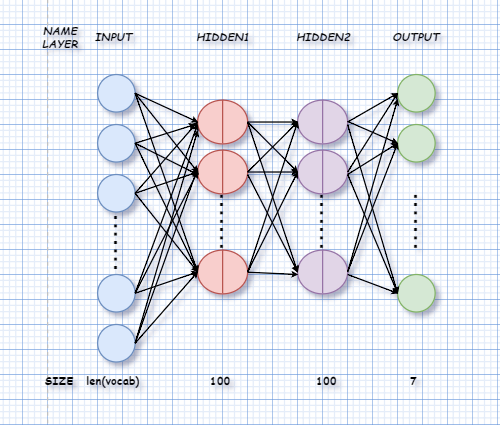

In [ ]:
Image('h (1).PNG',width=700)

**b. Triển khai code**

In [ ]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Parameters
learning_rate = 0.01
num_epochs = 10
batch_size = 150
display_step = 1

# Network Parameters
hidden_size = 100      # 1st layer and 2nd layer number of features
input_size = total_words # Words in vocab
num_classes = 7  

In [ ]:
class OurNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
        super(OurNet, self).__init__()
        self.layer_1 = nn.Linear(input_size,hidden_size, bias=True)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.output_layer = nn.Linear(hidden_size, num_classes, bias=True)

     def forward(self, x):
        out = self.layer_1(x)
        #print(out)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

In [ ]:
# input [batch_size, n_labels]
# output [max index for each item in batch, ... ,batch_size-1]
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(2, 7), requires_grad=True)
print(">>> batch of size 2 and 7 possible classes")
print(input)
target = Variable(torch.LongTensor(2).random_(7))
print(">>> array of size 'batch_size' with the index of the maxium label for each item")
print(target)
output = loss(input, target)
output.backward()

>>> batch of size 2 and 7 possible classes
tensor([[-0.4211,  1.2346, -1.7319,  1.1239, -0.1617, -0.7878, -0.6843],
        [ 0.4400,  0.3475, -1.8441,  0.4835,  0.5871,  1.0100,  0.4909]],
       requires_grad=True)
>>> array of size 'batch_size' with the index of the maxium label for each item
tensor([5, 4])


In [ ]:
net = OurNet(input_size, hidden_size, num_classes)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
print(net)

OurNet(
  (layer_1): Linear(in_features=6446, out_features=100, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=7, bias=True)
)


In [ ]:
def train():
  loss_history = []
  for epoch in range(num_epochs):
    total_batch = int(len(X_train_token)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x,batch_y = get_batch(i,batch_size)
        articles = Variable(torch.FloatTensor(batch_x))
        labels = Variable(torch.LongTensor(batch_y))
        #print("articles",articles)
        #print(batch_x, labels)
        #print("size labels",labels.size())

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(articles)
        #print("output:",outputs)
        #print("label ",labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 4 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, len(X_train_token)//batch_size, loss.data[0]))
            
  return loss_history

In [ ]:
loss_his=train()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/10], Step [4/26], Loss: 1.5265
Epoch [1/10], Step [8/26], Loss: 0.9797
Epoch [1/10], Step [12/26], Loss: 0.7960
Epoch [1/10], Step [16/26], Loss: 0.4982
Epoch [1/10], Step [20/26], Loss: 0.4320
Epoch [1/10], Step [24/26], Loss: 0.4774
Epoch [2/10], Step [4/26], Loss: 0.3652
Epoch [2/10], Step [8/26], Loss: 0.2311
Epoch [2/10], Step [12/26], Loss: 0.2977
Epoch [2/10], Step [16/26], Loss: 0.2525
Epoch [2/10], Step [20/26], Loss: 0.1291
Epoch [2/10], Step [24/26], Loss: 0.1528
Epoch [3/10], Step [4/26], Loss: 0.1287
Epoch [3/10], Step [8/26], Loss: 0.0984
Epoch [3/10], Step [12/26], Loss: 0.1595
Epoch [3/10], Step [16/26], Loss: 0.1006
Epoch [3/10], Step [20/26], Loss: 0.0868
Epoch [3/10], Step [24/26], Loss: 0.0782
Epoch [4/10], Step [4/26], Loss: 0.0391
Epoch [4/10], Step [8/26], Loss: 0.0307
Epoch [4/10], Step [12/26], Loss: 0.0390
Epoch [4/10], Step [16/26], Loss: 0.0263
Epoch [4/10], Step [20/26], Loss: 0.0279
Epoch [4/10], Step [24/26], Loss: 0.0176
Epoch [5/10], Step [4/26

### ***c. Kiểm thử***

In [ ]:
def get_batch_test(i,batch_size):
    batches = []
    results = []
    texts = X_test_token[i*batch_size:i*batch_size+batch_size]
    categories = y_test_token[i*batch_size:i*batch_size+batch_size]
    #print(categories)
    for text in texts:
        layer = np.zeros(total_words,dtype=float)
        
        for word in text.split(' '):
            layer[word2index[word.lower()]] += 1
           

        batches.append(layer)

    for label in categories:
        #index_y = -1
        if(label=='tp-none'):
          index_y = 0
        elif(label=='tp-house'):
          index_y = 1
        elif(label=='tp-hotel'):
          index_y = 2
        elif(label=='tp-apartment'):
          index_y = 3
        elif(label=='tp-warehouse'):
          index_y = 4
        elif (label=='tp-building'):
          index_y = 5
        else:
          index_y = 6
        results.append(index_y)
return np.array(batches),np.array(results)  

In [ ]:
correct = 0
total = 0
total_test_data = len(X_test_token)
batch_x_test,batch_y_test = get_batch_test(0,total_test_data)
articles = Variable(torch.FloatTensor(batch_x_test))
labels = torch.LongTensor(batch_y_test)
outputs = net(articles)
_, predicted = torch.max(outputs.data, 1)
total += labels.size(0)
correct += (predicted == labels).sum()

print('Accuracy of the network on the 1000 test articles: %d %%' % (100 * correct / total))

Accuracy of the network on the 1000 test articles: 90 %


## 2. LSTM

### 2.1 Mô tả kiến trúc

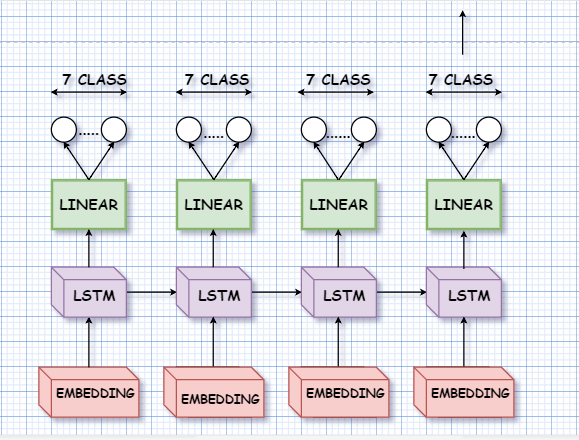

In [ ]:
Image('lstm.PNG',width=700)

### 2.2 Chuẩn bị dữ liệu

a. Phần Text

In [ ]:
def word (data):
  words =[]
  for text in data:
    for word in text.split(' '):
      words.append(word)
  return words

In [ ]:
word_train = word(X_data)
word_test = word(X_test)
print(word_train)
print(word_test)

['cho', 'thuê', 'nhà_nguyên', 'căn', '4pn', '4wc', 'quận', '3', 'đất', 'nền', 'sân_bay', 'long', 'thành_đồng', 'nai', 'thổ_cư', '100', 'cđt', 'hưng_thịnh', 'căn_hộ', 'đã', 'bàn_giao', 'oriental', 'plaza', 'mặt_tiền', 'âu', 'cơ', '–', 'mua', 'là', 'vào', 'ở', 'ngay_k', 'mở', 'bán', 'giai_đoạn', '2', 'siêu', 'dự_án', 'khu_đô_thị', 'river', 'view', 'cc', 'trích', 'sài', '–', 'hồ', 'tây', '58m2', '1', '4tỷ', 'căn', 'view', 'hồ', 'tây', 'cực', 'đẹp', 'cần', 'mua', 'nhà', 'mặt_phố', 'ở', 'quảng_an', 'tây', 'hồ', 'giá', 'khoảng', '4', 'tỷ', 'bán', 'miếng', 'đất', 'đường', 'số', '8', 'trường', 'thạnh', 'diện_tích', '60m2', 'giá', 'bán', '1tỷ4', 'bao', 'giấy_tờ', 'lh', '090', '257', '2019', 'bán', 'gấp', '2765m2', 'giá', 'cực', 'rẻ', '900ng', '1m2', 'đồng', 'trạng', 'cổ_đông', 'sơn', 'tây', 'lh', '0966', '615', '605', 'cho', 'thuê', 'mặt_bằng', 'cho', 'thuê', 'căn_hộ', '25m2', 'hoàng', 'hoa', 'thám', 'quận', 'tân_bình', 'shophouse', 'sun', 'hạ_long', 'cơ_hội', 'kinh_doanh', 'vàng', 'lợi_nhuận',

In [ ]:
from collections import Counter
def encodedtitle (data,words):
  ## Build a dictionary that maps words to integers
  counts = Counter(words)
  vocab = sorted(counts, key=counts.get, reverse=True)
  vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
  ## use the dict to tokenize each review in reviews_split
  ## store the tokenized reviews in reviews_ints
  title_ints = []
  for title in data:
    title_ints.append([vocab_to_int[word] for word in title.split()])
  return title_ints

In [ ]:
title_ints_train= encodedtitle (X_data,word_train)
title_ints_test= encodedtitle (X_test,word_test)
print(title_ints_train)
print(title_ints_test)

[[11, 12, 134, 24, 509, 2601, 13, 10], [5, 35, 388, 116, 2602, 2603, 59, 100, 237, 1165], [8, 238, 510, 2604, 347, 19, 270, 469, 57, 126, 421, 180, 42, 2605], [71, 1, 738, 7, 127, 53, 156, 365, 61], [157, 1427, 1800, 57, 94, 135, 847, 6, 1428, 24, 61, 94, 135, 81, 26], [16, 126, 2, 95, 42, 2606, 135, 94, 3, 2607, 17, 4], [1, 1429, 5, 9, 89, 36, 204, 286, 67, 258, 3, 1, 1801, 326, 2608, 37, 848, 2609, 1166], [1, 18, 2610, 3, 81, 29, 2611, 849, 193, 2612, 2613, 211, 135, 37, 1430, 1431, 1167], [11, 12, 136], [11, 12, 8, 511, 152, 227, 348, 13, 115], [327, 1432, 850, 205, 60, 239, 366, 118, 141, 186, 160, 440], [1, 140, 32, 5, 59, 3, 2614, 33, 512, 1168, 2615], [2, 194, 22, 1433, 43, 851, 562], [1, 23, 209, 328, 193, 513, 1802, 3, 70, 6, 7, 4], [2, 25, 2616, 2617, 2618, 2619, 509, 985, 10, 27], [5, 59, 563, 986, 228, 250, 739], [2, 41, 14, 2620, 1803, 7, 63, 84], [11, 607, 12, 43], [71, 1, 8, 21, 114, 187, 662, 740, 987, 251], [1804, 28, 16, 1, 24, 91, 564, 1169, 104, 128, 3, 565, 81, 422

b. Phần nhãn

In [ ]:
def encodedlabel (data):
  typehouse=[]
  for label in data:
    if(label=='tp-none'):
      typehouse.append(0)
    elif(label=='tp-house'):
      typehouse.append(1)
    elif(label=='tp-hotel'):
      typehouse.append(2)
    elif(label=='tp-apartment'):
      typehouse.append(3)
    elif(label=='tp-warehouse'):
      typehouse.append(4)
    elif (label=='tp-building'):
      typehouse.append(5)
    else:
      typehouse.append(6)
  return typehouse
    

In [ ]:
encoded_labels = encodedlabel(y_train_token)
print(encoded_labels)
encoded_label_test=encodedlabel(y_test_token)
print(encoded_label_test)

[1, 0, 3, 0, 3, 1, 0, 0, 4, 3, 1, 0, 1, 3, 1, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 0, 1, 6, 3, 1, 1, 0, 3, 0, 3, 1, 0, 3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0, 1, 1, 6, 1, 0, 1, 1, 0, 3, 3, 1, 3, 3, 3, 0, 6, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 1, 0, 1, 1, 3, 1, 1, 6, 0, 3, 1, 4, 3, 1, 0, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 3, 1, 1, 1, 0, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 6, 3, 0, 3, 1, 3, 0, 0, 0, 3, 0, 6, 3, 1, 3, 1, 1, 1, 3, 3, 0, 0, 0, 1, 1, 4, 1, 1, 1, 2, 1, 0, 0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 3, 3, 1, 0, 3, 1, 0, 3, 4, 1, 0, 3, 1, 3, 0, 1, 4, 3, 3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 3, 1, 0, 3, 3, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 6, 1, 1, 3, 3, 1, 0, 1, 6, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 

In [ ]:
encoded_labels=np.asarray(encoded_labels)
encoded_label_test=np.asarray(encoded_label_test)

In [ ]:
print(encoded_labels)
print(encoded_label_test)

c. Padding

In [ ]:
def pad_features(data, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(data), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(data):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [ ]:
# Test your implementation!

seq_length = 30

features_train = pad_features(title_ints_train, seq_length=seq_length)
features_test = pad_features(title_ints_test, seq_length=seq_length)

## test statements - do not change - ##
assert len(features_train)==len(title_ints_train), "Your features should have as many rows as reviews."
assert len(features_train[0])==seq_length, "Each feature row should contain seq_length values."
assert len(features_test)==len(title_ints_test), "Your features should have as many rows as reviews."
assert len(features_test[0])==seq_length, "Each feature row should contain seq_length values."


# print first 10 values of the first 30 batches 
print("Features train: ",features_train[:2,:27])
print("Features test: ",features_test[:2,:27])


Features train:  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   11   12  134   24  509]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    5   35  388  116 2602 2603   59]]
Features test:  [[   0    0    0    0    0    0    0    0    0    0    0    0    0 1057
  1058 1059    1   27  452  618  352  453  229 1060   25   49   82]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   11   13  253    3]]


d. Lấy Batch 

In [ ]:
def get_batch(i,batch_size):
    batches = []
    results = []
    texts = features_train[i*batch_size:i*batch_size+batch_size]
    categories = encoded_labels[i*batch_size:i*batch_size+batch_size]
    #print(categories)
    for text in texts:
        
           

        batches.append(text)

    for label in categories:
        #index_y = -1
        if(label==0):
            index_y = 0
            
        elif(label==1):
          index_y = 1
          
            
        elif(label==2):
          index_y = 2
          
            
        elif(label==3):
          index_y = 3
            
        elif(label==4):
          index_y = 4
            
        elif (label==5):
          index_y = 5
            
       
        else:
          
            index_y = 6
            
        results.append(index_y)


    return np.array(batches),np.array(results)

In [ ]:
print(get_batch(1,5))

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   16,  126,    2,   95,
          42, 2606,  135,   94,    3, 2607,   17,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1, 1429,    5,    9,   89,   36,  204,  286,   67,  258,    3,
           1, 1801,  326, 2608,   37,  848, 2609, 1166],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,   18, 2610,    3,   81,   29, 2611,  849,  193,
        2612, 2613,  211,  135,   37, 1430, 1431, 1167],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   11,   12,  136],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   11,
          12,    8,  511,  152,

### **2.3 Dựng mô hình**

In [ ]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Parameters
learning_rate = 0.01
num_epochs = 10
batch_size = 150
display_step = 1

# Network Parameters
hidden_size = 100      # 1st layer and 2nd layer number of features
input_size = total_words # Words in vocab
num_classes = 7  
input_dim=total_words
embedding_dim=150
hidden_dim=128
output_dim=7

In [ ]:
import torch.nn as nn
 
class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
 
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, num_layers=2, bidirectional=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
 
 
    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
 
        return self.fc(hidden)

In [ ]:
# input [batch_size, n_labels]
# output [max index for each item in batch, ... ,batch_size-1]
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(2, 7), requires_grad=True)
print(">>> batch of size 2 and 5 possible classes")
print(input)
target = Variable(torch.LongTensor(2).random_(7))
print(">>> array of size 'batch_size' with the index of the maxium label for each item")
print(target)
output = loss(input, target)
output.backward()

>>> batch of size 2 and 5 possible classes
tensor([[-0.9296, -0.6141,  0.7402,  0.5019,  0.2196,  1.2712,  0.8007],
        [-1.7442,  0.1947,  0.1023,  0.3975,  0.4550, -0.9347,  0.0519]],
       requires_grad=True)
>>> array of size 'batch_size' with the index of the maxium label for each item
tensor([3, 6])


In [ ]:
lstm = LSTM(input_dim, embedding_dim, hidden_dim, output_dim)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
print(lstm)

LSTM(
  (embedding): Embedding(6446, 150)
  (lstm): LSTM(150, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=256, out_features=7, bias=True)
)


### ***2.4 Huấn luyện mô hình***

In [ ]:
def train():
  loss_history = []
  for epoch in range(num_epochs):
    total_batch = int(len(X_train_token)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x,batch_y = get_batch(i,batch_size)
        articles = Variable(torch.LongTensor(batch_x))
        labels = Variable(torch.LongTensor(batch_y))
        #print("articles",articles)
        #print(batch_x, labels)
        #print("size labels",labels.size())

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = lstm(articles)
        #print("output:",outputs)
        #print("label ",labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 4 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, len(X_train_token)//batch_size, loss.item()))
            
  return loss_history

In [ ]:
loss_history=train()

Epoch [1/10], Step [4/26], Loss: 1.2606
Epoch [1/10], Step [8/26], Loss: 0.9104
Epoch [1/10], Step [12/26], Loss: 0.9534
Epoch [1/10], Step [16/26], Loss: 0.6637
Epoch [1/10], Step [20/26], Loss: 0.6181
Epoch [1/10], Step [24/26], Loss: 0.7555
Epoch [2/10], Step [4/26], Loss: 0.4691
Epoch [2/10], Step [8/26], Loss: 0.4066
Epoch [2/10], Step [12/26], Loss: 0.5572
Epoch [2/10], Step [16/26], Loss: 0.4161
Epoch [2/10], Step [20/26], Loss: 0.3484
Epoch [2/10], Step [24/26], Loss: 0.4397
Epoch [3/10], Step [4/26], Loss: 0.2629
Epoch [3/10], Step [8/26], Loss: 0.2571
Epoch [3/10], Step [12/26], Loss: 0.2890
Epoch [3/10], Step [16/26], Loss: 0.2663
Epoch [3/10], Step [20/26], Loss: 0.2512
Epoch [3/10], Step [24/26], Loss: 0.1789
Epoch [4/10], Step [4/26], Loss: 0.2471
Epoch [4/10], Step [8/26], Loss: 0.2023
Epoch [4/10], Step [12/26], Loss: 0.1860
Epoch [4/10], Step [16/26], Loss: 0.1890
Epoch [4/10], Step [20/26], Loss: 0.1984
Epoch [4/10], Step [24/26], Loss: 0.1605
Epoch [5/10], Step [4/26

### ***2.5 Kiểm Thử***

In [ ]:
def get_batch_test(i,batch_size):
    batches = []
    results = []
    texts = features_test[i*batch_size:i*batch_size+batch_size]
    categories = encoded_label_test[i*batch_size:i*batch_size+batch_size]
    #print(categories)
    for text in texts:
        batches.append(text)
           

        

    for label in categories:
        #index_y = -1
        if(label==0):
          index_y = 0
            
        elif(label==1):
          index_y = 1
          
            
        elif(label==2):
          index_y = 2
          
            
        elif(label==3):
          index_y = 3
            
        elif(label==4):
          index_y = 4
            
        elif (label==5):
          index_y = 5
            
       
        else:
          
            index_y = 6
            
        results.append(index_y)


    return np.array(batches),np.array(results)

In [ ]:
def test():
  test_losses = [] # track loss
  num_correct = 0
  lstm.eval()
  correct = 0
  total = 0
  
  for epoch in range(20):
    total_batch = int(len(X_test_token)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x,batch_y = get_batch_test(1,batch_size)
        articles = Variable(torch.LongTensor(batch_x))
        labels = Variable(torch.LongTensor(batch_y))
        #print("articles",articles)
        #print(batch_x, labels)
        #print("size labels",labels.size())

        # Forward + Backward + Optimize
        #optimizer.zero_grad()  # zero the gradient buffer
        outputs = lstm(articles)
        #print("output:",outputs)
        #print("label ",labels)
        test_loss = criterion(outputs, labels)
        test_losses.append(test_loss.item())
        #pred = torch.round(outputs)
        #print(pred)
        #print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('Accuracy of the network on the 1000 test articles: %d %%' % (100 * correct / total))
        
    return test_losses


In [ ]:
print(test())

Accuracy of the network on the 1000 test articles: 61 %
[2.6414942741394043, 2.6414942741394043, 2.6414942741394043, 2.6414942741394043, 2.6414942741394043, 2.6414942741394043]


# ***II: CÁC MÔ HÌNH HỌC MÁY TRUYỀN THỐNG***

## ***1. TF-IDF VECTOR AS FEATURES***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [ ]:
# transform the training and validation data using count vectorizer object
X_data_count = count_vect.transform(X_data)
X_test_count = count_vect.transform(X_test)

In [ ]:
print(X_data_count.shape)
print(X_test_count.shape)

(4000, 5695)
(1000, 5695)


### Character Level TF_IDF

In [ ]:
# ngram-char level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram_char.fit(X_data)
X_data_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(X_data)
# assume that we don't have test set before
X_test_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(X_test)

In [ ]:
X_data_tfidf_ngram_char.shape

(4000, 11102)

In [ ]:
svd_ngram_char = TruncatedSVD(n_components=300, random_state=42)
svd_ngram_char.fit(X_data_tfidf_ngram_char)

X_data_tfidf_ngram_char_svd = svd_ngram_char.transform(X_data_tfidf_ngram_char)
X_test_tfidf_ngram_char_svd = svd_ngram_char.transform(X_test_tfidf_ngram_char)

In [ ]:
X_data_tfidf_ngram_char_svd.shape

(4000, 300)

## ***2.CÁC MÔ HÌNH***

### ***A. BAYES***

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit( X_data_tfidf_ngram_char_svd , y_train)
score = naive_bayes.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of Navive Bayes: {0}%').format(score*100))

Accuracy of Navive Bayes: 82.69999999999999%


### ***B.SVM***

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit( X_data_tfidf_ngram_char_svd , y_train)
score = svm.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of SVM: {0}%').format(score*100))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM: 44.7%


### ***C. LOGISTIC REGRESSION***

In [ ]:
from sklearn import linear_model
linear=linear_model.LogisticRegression()
linear.fit( X_data_tfidf_ngram_char_svd , y_train)
score = linear.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of Logistic Regression: {0}%').format(score*100))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression: 89.4%


### ***D. DECISION TREE***

In [ ]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit( X_data_tfidf_ngram_char_svd , y_train)
score = decision_tree.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of Decision Tree: {0}%').format(score*100))

Accuracy of Decision Tree: 76.4%


### ***E. RANDOM FOREST***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit( X_data_tfidf_ngram_char_svd , y_train)
score = random_forest.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of Random Forest: {0}%').format(score*100))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest: 76.7%


### ***F.GRADIENT BOOSTING CLASSIFIER***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
model.fit( X_data_tfidf_ngram_char_svd , y_train)
score = model.score(X_test_tfidf_ngram_char_svd ,y_test)
print(('Accuracy of Gradient Boosting: {0}%').format(score*100))

Accuracy of Gradient Boosting: 80.2%
